## CartPole Gördeszkázás

> **Probléma**: Ha Péter el akar menekülni a farkas elől, gyorsabban kell tudnia mozogni, mint ő. Megnézzük, hogyan tanulhat meg Péter gördeszkázni, különösen az egyensúlyozást, Q-Learning segítségével.

Először telepítsük a gym-et, és importáljuk a szükséges könyvtárakat:


In [1]:
#code block 1

## Hozzon létre egy cartpole környezetet


In [ ]:
#code block 2

Ahhoz, hogy lássuk, hogyan működik a környezet, futtassunk egy rövid szimulációt 100 lépésig.


In [ ]:
#code block 3

A szimuláció során meg kell szereznünk a megfigyeléseket, hogy eldönthessük, hogyan cselekedjünk. Valójában a `step` függvény visszaadja nekünk az aktuális megfigyeléseket, a jutalomfüggvényt, és a `done` jelzőt, amely jelzi, hogy van-e értelme folytatni a szimulációt vagy sem:


In [ ]:
#code block 4

Megkaphatjuk ezeknek a számoknak a minimum- és maximumértékét:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Vizsgáljunk meg más diszkretizációs módszert is bin-ek használatával:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Futtassunk most egy rövid szimulációt, és figyeljük meg ezeket a diszkrét környezeti értékeket.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


## Q-tábla szerkezete


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


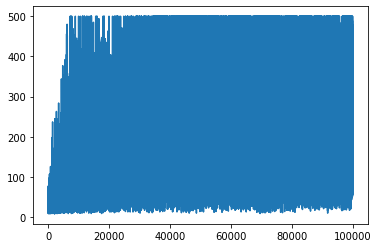

In [20]:
plt.plot(rewards)

Ebből a grafikonból nem lehet semmit sem megállapítani, mert a sztochasztikus tanulási folyamat jellege miatt a tanulási szakaszok hossza nagyban változik. Hogy jobban értelmezhető legyen ez a grafikon, kiszámíthatjuk a **futó átlagot** a kísérletsorozatokon, mondjuk 100-on. Ezt kényelmesen elvégezhetjük a `np.convolve` használatával:


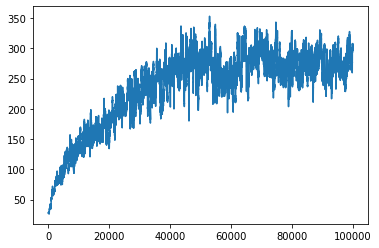

In [22]:
#code block 12

## Hyperparaméterek változtatása és az eredmények megtekintése

Most igazán érdekes lenne látni, hogyan viselkedik a betanított modell. Futtassuk le a szimulációt, és ugyanazt az akcióválasztási stratégiát fogjuk követni, mint a tanítás során: mintavétel a Q-Table valószínűségi eloszlása alapján:


In [23]:
# code block 13

## Eredmény mentése animált GIF formátumban

Ha szeretnéd lenyűgözni a barátaidat, küldhetsz nekik egy animált GIF képet az egyensúlyozó rúdról. Ehhez meghívhatjuk az `env.render` függvényt, hogy képkockát készítsünk, majd ezeket animált GIF formátumban menthetjük a PIL könyvtár segítségével:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Felelősségkizárás**:  
Ez a dokumentum az [Co-op Translator](https://github.com/Azure/co-op-translator) AI fordítási szolgáltatás segítségével lett lefordítva. Bár törekszünk a pontosságra, kérjük, vegye figyelembe, hogy az automatikus fordítások hibákat vagy pontatlanságokat tartalmazhatnak. Az eredeti dokumentum az eredeti nyelvén tekintendő hiteles forrásnak. Kritikus információk esetén javasolt a professzionális, emberi fordítás igénybevétele. Nem vállalunk felelősséget a fordítás használatából eredő félreértésekért vagy téves értelmezésekért.
